In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import analysis_util
from inspect_util import Chunk
from inspect_util import remove_empty_lines
from inspect_util import normalize_lines

In [2]:
df = pd.read_csv('data/resolution_composition.csv')
print(len(df))
df.head()

13573


,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0


In [3]:
df_po = pd.read_csv('data/partial_order_result.csv')
df = pd.merge(df, df_po, on='chunk_id', how='inner', suffixes=('', ''))
df.head()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0,True,18,12
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0,True,113,101
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0,True,6,5
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0,True,5,3
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0,True,6,5


In [4]:
malformed_chunks = pd.read_csv('data/malformed_chunks.csv')
malformed_chunks = malformed_chunks['chunk_id'].unique()
print(f'Removing {len(malformed_chunks)} malformed chunks')
df = df[~df['chunk_id'].isin(malformed_chunks)]
print(f'Total number of chunks: {len(df)}')

Removing 264 malformed chunks
Total number of chunks: 13309


In [5]:
# remove imprecise resolutions
df = df[df['v1_percentage']!= -1]
print(len(df))

10726


In [6]:
# remove implicit forks
df = analysis_util.filter_implicit_forks(df)
print(f'New total number of chunks: {len(df)}')

Total projects:  1082
Filtered 6 of 1082 projects for being implicit forks: {'IceColdSandwich/android_frameworks_base', 'RealVNC/android-frameworks-base-with-screenshot-tweaks', 'allwinner-ics/platform_frameworks_base', 'cgjones/android-frameworks-base', 'AOKP/frameworks_base_disabled', 'adetaylor/android-frameworks-base-with-remote-control-service'}
Total valid projects:  1076
New total number of chunks: 10177


In [7]:
df.describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,1.017700e+04,10177.00000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.00000,10177.000000,10177.000000,10177.000000,10177.000000
mean,1.097355e+06,0.55345,0.533306,0.510045,0.489930,0.086609,1.823622,2.175789,32.502489,36.404496,6.79493,6.965216,0.170286,15.298418,8.516164
std,2.119343e+05,0.31901,0.320762,0.304105,0.304072,0.198059,6.835704,10.463504,29.994432,30.863874,30.51060,33.251309,20.674248,68.754593,36.407157
min,7.766620e+05,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-388.000000,2.000000,1.000000
25%,9.398230e+05,0.33000,0.330000,0.330000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,2.000000,-2.000000,4.000000,2.000000
50%,1.064856e+06,0.50000,0.500000,0.500000,0.500000,0.000000,1.000000,1.000000,33.330000,40.000000,2.00000,3.000000,0.000000,6.000000,3.000000
75%,1.258354e+06,0.81000,0.800000,0.700000,0.670000,0.000000,1.000000,2.000000,50.000000,50.000000,5.00000,5.000000,2.000000,12.000000,7.000000
max,1.658666e+06,1.00000,1.000000,1.000000,1.000000,1.000000,353.000000,689.000000,100.000000,100.000000,1352.00000,1402.000000,1401.000000,2922.000000,1557.000000


In [8]:
# chunks where the normalized percentage don't add to 1
for index, row in df.iterrows():
    v1 = row['normalized_v1_percentage']
    v2 = row['normalized_v2_percentage']
    if v1 + v2 != 1:
        print(row['chunk_id'], v1, v2)

947182 0.78 0.23
964098 0.0 0.9
988476 0.42 0.57
1045733 0.57 0.42
1091475 0.0 0.99
1108391 0.05 0.84
1115864 0.68 0.33
1144705 0.82 0.17
1273096 0.68 0.33
1392141 0.57 0.42
1421052 0.42 0.57
1465800 0.26 0.73


In [9]:
import importlib
importlib.reload(analysis_util)
v1_bars, v2_bars = analysis_util.get_normalized_composition_percentage_data(df)

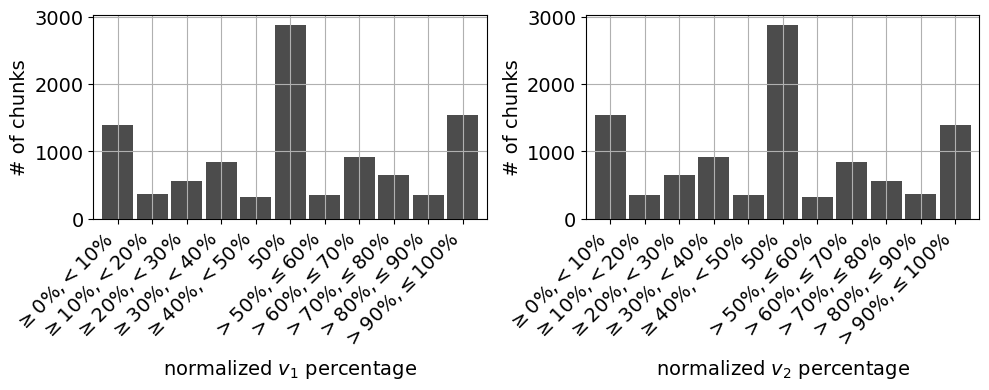

In [10]:
df_plot_v1 = pd.DataFrame(v1_bars, columns=['Chunks', 'Interval'])
df_plot_v2 = pd.DataFrame(v2_bars, columns=['Chunks', 'Interval'])
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

df_plot_v1.plot(kind='bar', x='Interval', y='Chunks', width=0.9, ax = ax[0], align='center', alpha=0.7, legend=False, color='k', zorder=1)
df_plot_v2.plot(kind='bar', x='Interval', y='Chunks', width=0.9, ax = ax[1], align='center', alpha=0.7, legend=False, color='k', zorder=1)
ax[0].set_xlabel("normalized $v_{1}$ percentage", fontsize=14)
ax[0].set_ylabel("# of chunks", fontsize=14)
ax[1].set_xlabel("normalized $v_{2}$ percentage", fontsize=14)
ax[1].set_ylabel("# of chunks", fontsize=14)
ax[0].tick_params(axis="x", labelsize=14)
ax[0].tick_params(axis="y", labelsize=14)
ax[1].tick_params(axis="x", labelsize=14)
ax[1].tick_params(axis="y", labelsize=14)
ax[0].grid(zorder=-1)
ax[1].grid(zorder=-1)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
fig.tight_layout()
plt.show()
fig.savefig('figures/composition_percentage.png', dpi=300, bbox_inches = "tight")


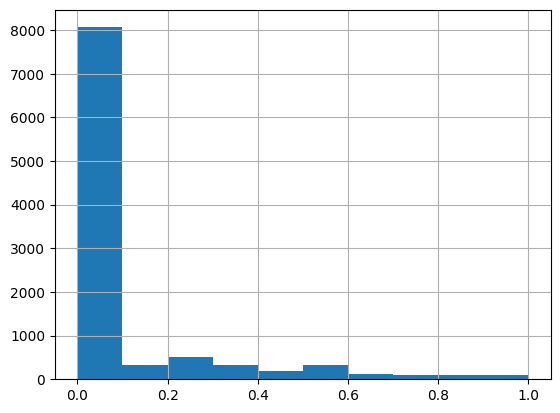

In [11]:
df['intersection_percentage'].hist()
plt.show()

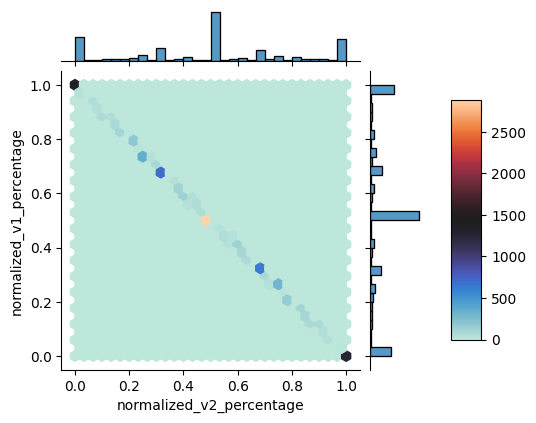

In [12]:
x = df['normalized_v2_percentage']
y = df['normalized_v1_percentage']

p1 = sns.jointplot(x=x, y=y, kind='hex', cmap='icefire')
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible

cbar_ax = p1.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
plt.show()

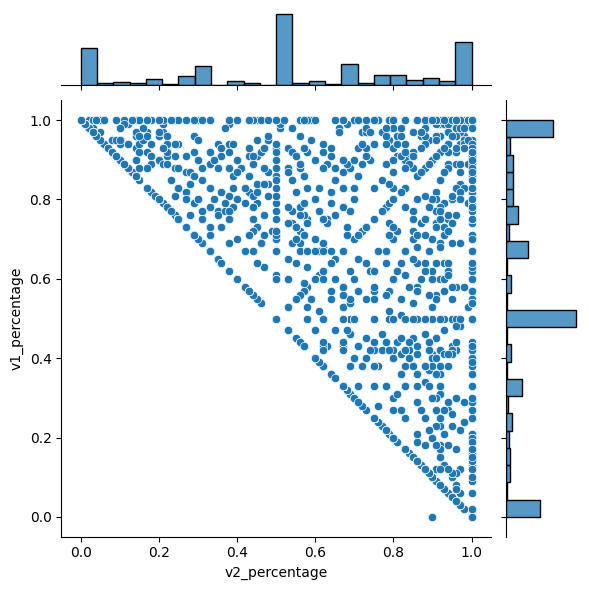

In [13]:
x = df['v2_percentage']
y = df['v1_percentage']
sns.jointplot(x=x, y=y, kind='scatter', cmap='BuPu')
plt.show()

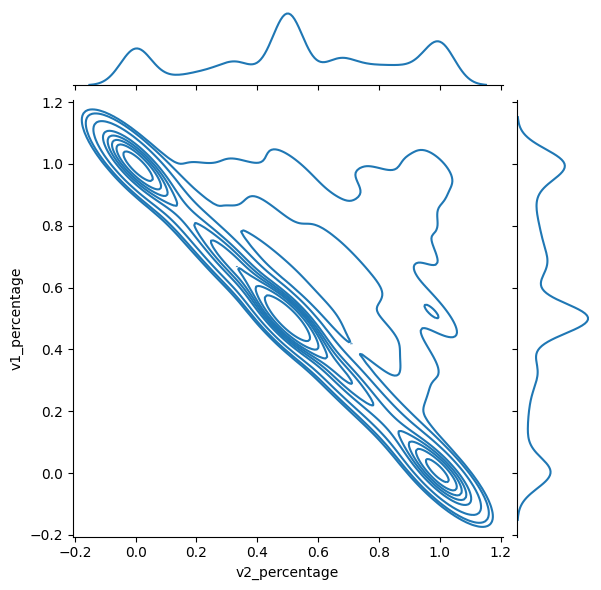

In [14]:
# https://en.wikipedia.org/wiki/Kernel_density_estimation
x = df['v2_percentage']
y = df['v1_percentage']
sns.jointplot(x=x, y=y, kind='kde')
plt.show()

In [15]:
v1v2 = analysis_util.get_chunk_composition_pattern_data('v1 v2', df)
v2v1 = analysis_util.get_chunk_composition_pattern_data('v2 v1', df)
v1_only = analysis_util.get_chunk_composition_pattern_data('v1', df)
v2_only = analysis_util.get_chunk_composition_pattern_data('v2', df)
v1v2v1 = analysis_util.get_chunk_composition_pattern_data('v1 v2 v1', df)
v2v1v2 = analysis_util.get_chunk_composition_pattern_data('v2 v1 v2', df)
no_alternation = len(v1v2) + len(v2v1)
some_alternation = len(v1v2v1) + len(v2v1v2)
print(f'Only v1 lines: {len(v1_only)} ({(len(v1_only)/len(df)*100):.2f}%)')
print(f'Only v2 lines: {len(v2_only)} ({(len(v2_only)/len(df)*100):.2f}%)')
print(f'No alternation (v1v2): {len(v1v2)} ({(len(v1v2)/len(df)*100):.2f}%)')
print(f'No alternation (v2v1): {len(v2v1)} ({(len(v2v1)/len(df)*100):.2f}%)')
# print(f'No alternation (aggregate): {no_alternation} ({(no_alternation/len(df)*100):.2f}%)')
print(f'Some alternation (v1v2v1 or v2v1v2): {some_alternation} ({(some_alternation/len(df)*100):.2f}%)')
easy_cases = no_alternation + some_alternation + len(v1_only) + len(v2_only)
remaining = len(df) - easy_cases

print('-------------')
print(f'Easier cases (all above): {easy_cases} ({(easy_cases/len(df)*100):.2f}%)')
print(f'Remaining (harder cases): {remaining} ({(remaining/len(df)*100):.2f}%)')



Only v1 lines: 1367 (13.43%)
Only v2 lines: 1260 (12.38%)
No alternation (v1v2): 2677 (26.30%)
No alternation (v2v1): 2093 (20.57%)
Some alternation (v1v2v1 or v2v1v2): 484 (4.76%)
-------------
Easier cases (all above): 7881 (77.44%)
Remaining (harder cases): 2296 (22.56%)


In [16]:
patterns = ['v1', 'v2', 'v1 v2', 'v2 v1', 'v1 v2 v1', 'v2 v1 v2']
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
analysis_util.get_chunk_composition_boxplot(df, patterns, 'chunk_size', 'Chunk size', ax[0])
analysis_util.get_chunk_composition_boxplot(df, patterns, 'resolution_size', 'Resolution size', ax[1])
ax[0].set_title('Chunk size')
ax[1].set_title('Resolution size')
fig.tight_layout()


In [17]:
df['chunk_size_delta'].hist()

<AxesSubplot:title={'center':'Resolution size'}, xlabel='Resolution pattern', ylabel='Resolution size'>

## Distribuição dos tipos de resolução em relação à diferença de tamanho entre v1 e v2

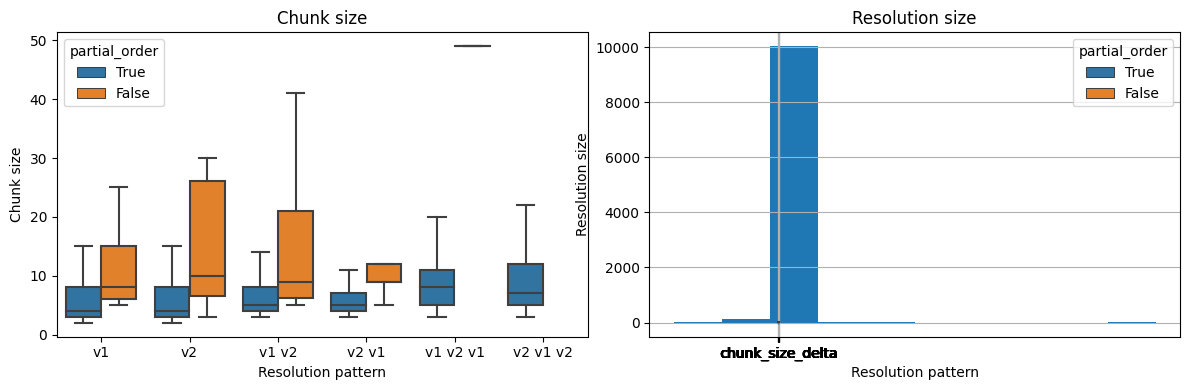

In [18]:
df.boxplot(column=['chunk_size_delta'], showfliers=False)
plt.show()

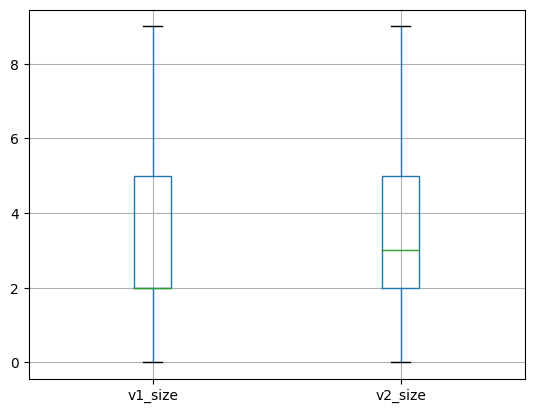

In [19]:
df.boxplot(column=['v1_size', 'v2_size'], showfliers=False)
plt.show()

In [20]:
import importlib
importlib.reload(analysis_util)
df_plot = analysis_util.get_strategies_plot_df(df, v1_only, v2_only, v1v2, v2v1, 'chunk_size_delta')
# display(df_plot.tail())

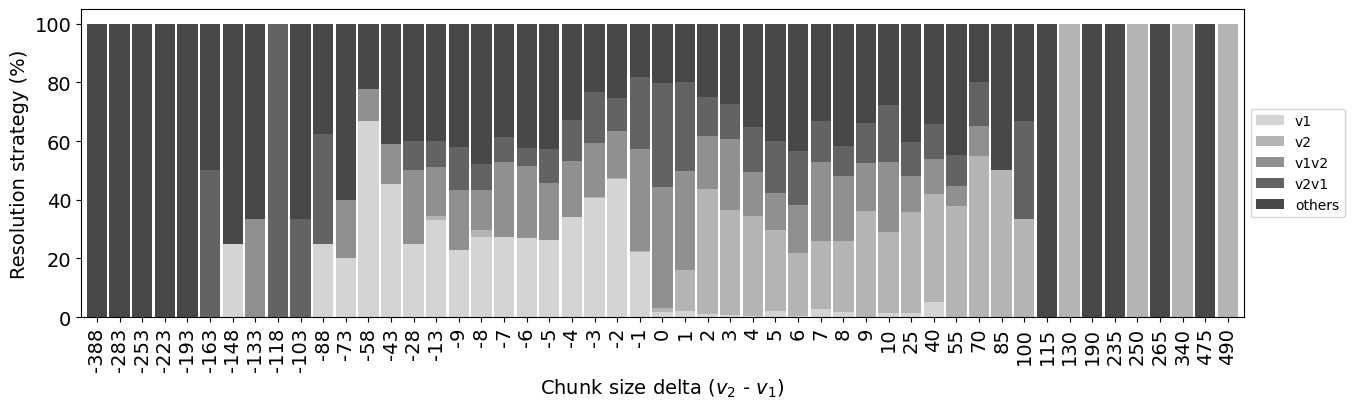

In [21]:
plt.style.use('tableau-colorblind10')
# colors=['black','whitesmoke', 'darkgray','dimgray','lightgray']
colors = ['#D4D4D4', '#B4B4B4', '#909090', '#636363', '#494848']
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
df_plot.plot(kind='bar', x='delta', width=0.9, stacked=True, ax = ax, color=colors)
ax.set_ylabel("Resolution strategy (%)", fontsize=14)
ax.set_xlabel("Chunk size delta ($v_{2}$ - $v_{1}$)", fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
fig.savefig('figures/resolution_composition.png', dpi=300, bbox_inches = "tight")

In [22]:
df_plot[df_plot['delta']==0]

,delta,v1,v2,v1v2,v2v1,others
25,0,1.611227,1.351351,41.528067,35.18711,20.322245


### Distance from v1 or v2

On average, from the chunks that were resolved using only v1 or v2 lines, how far are they from the complete v1 or v2 solution?

In [23]:
v1_only.describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,1.367000e+03,1367.0,1367.0,1367.0,1367.0,1367.0,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,1.087681e+06,1.0,0.0,1.0,0.0,0.0,3.168252,1.059985,49.862151,44.989027,6.060717,1.059985,-5.000732,8.003658,3.298464
std,2.011784e+05,0.0,0.0,0.0,0.0,0.0,7.108926,2.887734,19.275360,49.766474,9.882396,2.887734,10.272673,11.633841,6.215636
min,7.769150e+05,1.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-161.000000,2.000000,1.000000
25%,9.457500e+05,1.0,0.0,1.0,0.0,0.0,1.000000,0.000000,33.330000,0.000000,2.000000,0.000000,-5.000000,3.000000,1.000000
50%,1.045144e+06,1.0,0.0,1.0,0.0,0.0,1.000000,0.000000,50.000000,0.000000,3.000000,0.000000,-2.000000,4.000000,1.000000
75%,1.183976e+06,1.0,0.0,1.0,0.0,0.0,2.000000,1.000000,60.000000,100.000000,5.000000,1.000000,-1.000000,8.000000,3.000000
max,1.652304e+06,1.0,0.0,1.0,0.0,0.0,157.000000,41.000000,98.330000,100.000000,161.000000,41.000000,39.000000,164.000000,87.000000


For chunks that were resolved using only some lines of v1, they miss, on average, 3.17 or 49.9% of V1 lines. Interestingly, the average size of V2 in these chunks is 1 (min 0, max 41).

In [24]:
v2_only.describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,1.260000e+03,1260.0,1260.000000,1260.0,1260.000000,1260.0,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,1.086808e+06,0.0,0.999921,0.0,0.999921,0.0,0.775397,4.414286,38.253968,52.304365,0.775397,7.679365,6.903968,9.453968,3.721429
std,1.953527e+05,0.0,0.002817,0.0,0.002817,0.0,2.157323,16.840978,48.620025,20.535191,2.157323,20.598211,20.708794,22.259826,10.763957
min,7.770420e+05,0.0,0.900000,0.0,0.900000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-25.000000,2.000000,1.000000
25%,9.472388e+05,0.0,1.000000,0.0,1.000000,0.0,0.000000,1.000000,0.000000,42.860000,0.000000,2.000000,2.000000,3.000000,1.000000
50%,1.069216e+06,0.0,1.000000,0.0,1.000000,0.0,0.000000,1.000000,0.000000,50.000000,0.000000,3.000000,3.000000,4.000000,1.000000
75%,1.161443e+06,0.0,1.000000,0.0,1.000000,0.0,1.000000,3.000000,100.000000,66.670000,1.000000,6.000000,6.000000,9.000000,3.000000
max,1.611177e+06,0.0,1.000000,0.0,1.000000,0.0,34.000000,478.000000,100.000000,99.170000,34.000000,484.000000,484.000000,489.000000,305.000000


For chunks that were resolved using only some lines of v2, they miss, on average, 4.41 or 52.3% of V2 lines. Interestingly, as happened with v1_only, the average size of V1 in these chunks is 0.77 (min 0, max 34).

### Sample of v1_only chunks

In [25]:
sample_v1 = v1_only.sample(3, random_state = 42)
sample_v1.head()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
4193,975625,1.0,0.0,1.0,0.0,0.0,v1,1,0,50.00,0.0,2,0,-2.0,True,2,1
10299,1300416,1.0,0.0,1.0,0.0,0.0,v1,6,4,54.55,100.0,11,4,-7.0,True,18,7
5815,1040848,1.0,0.0,1.0,0.0,0.0,v1,1,1,50.00,100.0,2,1,-1.0,True,3,1


### Chunk 1

In [26]:
chunk1 = Chunk(int(sample_v1.iloc[0]['chunk_id']))
print(chunk1.get_conflict_text())

import org.hibernate.cache.RegionFactory;
import org.hibernate.cache.impl.NoCachingRegionFactory;
import org.hibernate.cache.impl.bridge.RegionFactoryCacheProviderBridge;
<<<<<<<
import org.hibernate.engine.jdbc.JdbcSupport;
import org.hibernate.engine.jdbc.batch.internal.BatchBuilder;
>>>>>>>
import org.hibernate.engine.jdbc.spi.ExtractedDatabaseMetaData;
import org.hibernate.engine.jdbc.spi.JdbcServices;
import org.hibernate.engine.transaction.spi.TransactionFactory;




In [27]:
print(chunk1.resolution)

import org.hibernate.cache.RegionFactory;
import org.hibernate.cache.impl.NoCachingRegionFactory;
import org.hibernate.cache.impl.bridge.RegionFactoryCacheProviderBridge;
import org.hibernate.engine.jdbc.JdbcSupport;
import org.hibernate.engine.jdbc.spi.ExtractedDatabaseMetaData;
import org.hibernate.engine.jdbc.spi.JdbcServices;
import org.hibernate.engine.transaction.spi.TransactionFactory;



In [28]:
resolution = chunk1.get_clean_solution()
resolution = remove_empty_lines(resolution)
v1 = normalize_lines(chunk1.v1.splitlines())
v1 = remove_empty_lines(v1)
analysis_util.print_missing_lines(v1, resolution)

importorg.hibernate.engine.jdbc.batch.internal.BatchBuilder;


### Chunk 2

In [29]:
chunk2 = Chunk(int(sample_v1.iloc[1]['chunk_id']))
print(chunk2.get_conflict_text())

package br.com.imhotep.testes;

<<<<<<<
import java.io.BufferedReader;
import java.io.File;
import java.io.FileOutputStream;
import java.io.FileReader;
import java.io.PrintStream;
import java.math.BigDecimal;
import java.math.RoundingMode;
import java.sql.ResultSet;
import java.sql.SQLException;

import br.com.imhotep.excecoes.ExcecaoEstoqueNaoAtualizado;
import br.com.imhotep.linhaMecanica.LinhaMecanica;

import java.util.ArrayList;
import java.util.Collection;
import java.util.List;

import br.com.imhotep.linhaMecanica.LinhaMecanicaAGHU;
>>>>>>>







In [30]:
print(chunk2.resolution)

package br.com.imhotep.testes;

import java.math.BigDecimal;
import java.math.RoundingMode;
import java.sql.ResultSet;
import java.sql.SQLException;

import br.com.imhotep.linhaMecanica.LinhaMecanica;







In [31]:
resolution = chunk2.get_clean_solution()
resolution = remove_empty_lines(resolution)
v1 = normalize_lines(chunk2.v1.splitlines())
v1 = remove_empty_lines(v1)
analysis_util.print_missing_lines(v1, resolution)

importjava.io.BufferedReader;
importjava.io.File;
importjava.io.FileOutputStream;
importjava.io.FileReader;
importjava.io.PrintStream;
importbr.com.imhotep.excecoes.ExcecaoEstoqueNaoAtualizado;


### Chunk 3

In [32]:
chunk3 = Chunk(int(sample_v1.iloc[2]['chunk_id']))
print(chunk3.get_conflict_text())

import org.slf4j.Logger;
import org.slf4j.LoggerFactory;

<<<<<<<
import com.qcadoo.plugin.api.PluginUtils;
import com.qcadoo.view.api.ViewDefinition;
import com.qcadoo.plugin.api.PluginUtil;
>>>>>>>
import com.qcadoo.view.api.ViewDefinitionState;
import com.qcadoo.view.internal.HookDefinition;
import com.qcadoo.view.internal.api.ViewDefinition;




In [33]:
print(chunk3.resolution)

import org.slf4j.Logger;
import org.slf4j.LoggerFactory;

import com.qcadoo.plugin.api.PluginUtils;
import com.qcadoo.view.api.ViewDefinitionState;
import com.qcadoo.view.internal.HookDefinition;
import com.qcadoo.view.internal.api.ViewDefinition;



In [34]:
resolution = chunk3.get_clean_solution()
resolution = remove_empty_lines(resolution)
v1 = normalize_lines(chunk3.v1.splitlines())
v1 = remove_empty_lines(v1)
analysis_util.print_missing_lines(v1, resolution)

importcom.qcadoo.view.api.ViewDefinition;


### Sample of v2_only chunks

In [35]:
sample_v2 = v2_only.sample(3, random_state = 42)
sample_v2.head()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
734,794736,0.0,1.0,0.0,1.0,0.0,v2,1,1,100.0,50.00,1,2,1.0,True,3,1
10360,1301843,0.0,1.0,0.0,1.0,0.0,v2,0,15,0.0,93.75,0,16,16.0,True,17,1
381,784355,0.0,1.0,0.0,1.0,0.0,v2,1,1,100.0,50.00,1,2,1.0,True,4,1


### Chunk 1

In [36]:
chunk1 = Chunk(int(sample_v2.iloc[0]['chunk_id']))
print(chunk1.get_conflict_text())


import hudson.Extension;
import hudson.FilePath;
<<<<<<<
import hudson.FilePath.FileCallable;
import jenkins.MasterToSlaveFileCallable;
import hudson.Functions;
>>>>>>>
import hudson.model.Computer;
import hudson.model.Node;
import hudson.remoting.Callable;




In [37]:
print(chunk1.resolution)


import hudson.Extension;
import hudson.FilePath;
import jenkins.MasterToSlaveFileCallable;
import hudson.model.Computer;
import hudson.model.Node;
import hudson.remoting.Callable;



In [38]:
resolution = chunk1.get_clean_solution()
resolution = remove_empty_lines(resolution)
v2 = normalize_lines(chunk1.v2.splitlines())
v2 = remove_empty_lines(v2)
analysis_util.print_missing_lines(v2, resolution)

importhudson.Functions;


### Chunk 2

In [39]:
chunk2 = Chunk(int(sample_v2.iloc[1]['chunk_id']))
print(chunk2.get_conflict_text())

    private static final String TYPE_PARAMETER = "type";
    private static final String VALUE_PARAMETER = "value";
    private static final String MODULE_PARAMETER = "module";
<<<<<<<
    private static final String STACKTRACE_PARAMETER = "stacktrace";
    private static final String DEFAULT_PACKAGE_NAME = "(default)";
    private final InterfaceBinding<StackTraceInterface> stackTraceInterfaceBinding;

    /**
     * Creates a Binding system to send a {@link ExceptionInterface} on JSON stream.
     * <p>
     * Exceptions may contain StackTraces, this means that the system should also be able to send a
     * {@link StackTraceInterface} on the JSON stream.
     * </p>
     *
     * @param stackTraceInterfaceBinding InterfaceBinding allowing to send a {@link StackTraceInterface} on the JSON
     *                                   stream.
     */
    public ExceptionInterfaceBinding(InterfaceBinding<StackTraceInterface> stackTraceInterfaceBinding) {
        this.stackTraceInterfaceBind

In [40]:
print(chunk2.resolution)

    private static final String TYPE_PARAMETER = "type";
    private static final String VALUE_PARAMETER = "value";
    private static final String MODULE_PARAMETER = "module";
    private static final String DEFAULT_PACKAGE_NAME = "(default)";

    @Override
    public void writeInterface(JsonGenerator generator, ExceptionInterface exceptionInterface) throws IOException {



In [41]:
resolution = chunk2.get_clean_solution()
resolution = remove_empty_lines(resolution)
v2 = normalize_lines(chunk2.v2.splitlines())
v2 = remove_empty_lines(v2)
analysis_util.print_missing_lines(v2, resolution)

privatestaticfinalStringSTACKTRACE_PARAMETER="stacktrace";
privatefinalInterfaceBinding<StackTraceInterface>stackTraceInterfaceBinding;
/**
*CreatesaBindingsystemtosenda{@linkExceptionInterface}onJSONstream.
*<p>
*ExceptionsmaycontainStackTraces,thismeansthatthesystemshouldalsobeabletosenda
*{@linkStackTraceInterface}ontheJSONstream.
*</p>
*
*@paramstackTraceInterfaceBindingInterfaceBindingallowingtosenda{@linkStackTraceInterface}ontheJSON
*stream.
*/
publicExceptionInterfaceBinding(InterfaceBinding<StackTraceInterface>stackTraceInterfaceBinding){
this.stackTraceInterfaceBinding=stackTraceInterfaceBinding;
}


### Chunk 3

In [42]:
chunk3 = Chunk(int(sample_v2.iloc[2]['chunk_id']))
print(chunk3.get_conflict_text())

        this.parameterConverter = parameterConverter;
    }

<<<<<<<
    public void execute() throws Exception {
    public void execute() {
        Clock buildTimeClock = new Clock();

>>>>>>>
        StartParameter startParameter = null;

        try {




In [43]:
print(chunk3.resolution)

        this.parameterConverter = parameterConverter;
    }

    public void execute() {
        StartParameter startParameter = null;

        try {



In [44]:
resolution = chunk3.get_clean_solution()
resolution = remove_empty_lines(resolution)
v2 = normalize_lines(chunk3.v2.splitlines())
v2 = remove_empty_lines(v2)
analysis_util.print_missing_lines(v2, resolution)

ClockbuildTimeClock=newClock();
